# Compact quantum isomorphism

In [33]:
import numpy as np

In [34]:
def fixed_points(aut, size):
    P = [i for i in range(size)]
    P = aut(P)
    ret = []
    for i in range(size):
        if P[i] == i:
            ret.append(i)
    return ret


Testing with size:  3

Testing with size:  4

Testing with size:  5

Testing with size:  6

Testing with size:  7


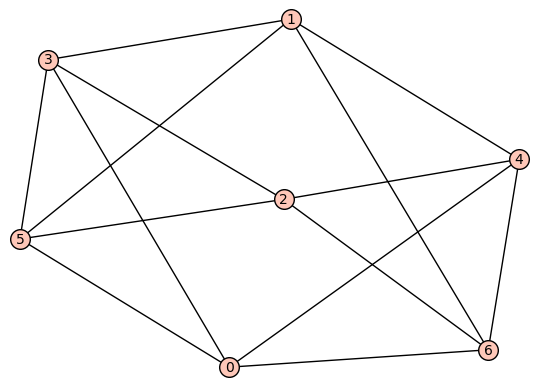

In [37]:
min_size = 3
max_size = 7

for size in range(min_size, max_size + 1):
    print("\nTesting with size: ", size)
    cnt = 0
    
    for G in graphs(size):
        if not G.is_regular() or not G.is_connected():
            continue
        
        Aut = G.automorphism_group()
        disjoint = False
        
        for aut1 in Aut:
            if len(aut1.cycle_tuples()) == 0:
                continue
            for aut2 in Aut:
                if len(aut2.cycle_tuples()) == 0:
                    continue
                if disjoint:
                    break
                
                fixed = fixed_points(aut1, size)
                fixed.extend(fixed_points(aut2, size));
                if len(fixed) == size and len(set(fixed)) == size:
                    disjoint = True
        
        if not disjoint:
            continue
            
        generously = False
        M = np.zeros((size, size));
        cnt_trans = 0
        for aut1 in Aut:
            P = [i for i in range(size)]
            P = aut1(P)
            
            for i in range(size):
                if i != P[i] and P[P[i]] == i:
                    if M[i, P[i]] == 0:
                        M[i, P[i]] = M[P[i], i] = 1
                        cnt_trans += 1
                        
            if cnt_trans == size*(size-1)//2:
                generously = True
                break
                
        if generously:
            continue
        
        G.plot().show()